In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader as pdr
from datetime import datetime, date, time, timezone



In [2]:
df=pd.read_csv("stock_details_5_years.csv")
df.head()




,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Company
0,2018-11-29 00:00:00-05:00,43.829761,43.863354,42.639594,43.083508,167080000,0.00,0.0,AAPL
1,2018-11-29 00:00:00-05:00,104.769074,105.519257,103.534595,104.636131,28123200,0.00,0.0,MSFT
2,2018-11-29 00:00:00-05:00,54.176498,55.007500,54.099998,54.729000,31004000,0.00,0.0,GOOGL
3,2018-11-29 00:00:00-05:00,83.749496,84.499496,82.616501,83.678497,132264000,0.00,0.0,AMZN
4,2018-11-29 00:00:00-05:00,39.692784,40.064904,38.735195,39.037853,54917200,0.04,0.0,NVDA


In [4]:


def get_stock_data(ticker, start, end):
    data = pdr.DataReader(ticker, "yahoo", start, end)
    data.insert(0, "Ticker", ticker)
    return data

In [13]:
# ... existing imports ...
import yfinance as yf

def get_stock_data(ticker, start, end):
    # Use yfinance instead of pandas_datareader
    data = yf.download(ticker, start=start, end=end)
    data.insert(0, "Ticker", ticker)
    return data

In [14]:
ticker='DIS'
start=datetime(2019,1,1)
end=datetime(2024,1,1)

data=get_stock_data(ticker,start,end)
data.head()


[*********************100%***********************]  1 of 1 completed


Price,Ticker,Adj Close,Close,High,Low,Open,Volume
Ticker,,DIS,DIS,DIS,DIS,DIS,DIS
Date,,,,,,,
2019-01-02,DIS,106.811844,108.970001,109.139999,107.730003,108.099998,9723500
2019-01-03,DIS,104.224129,106.330002,108.650002,105.940002,108.480003,10594700
2019-01-04,DIS,107.439163,109.610001,110.750000,107.250000,107.940002,10122800
2019-01-07,DIS,108.370354,110.559998,111.400002,109.300003,109.910004,6714700
2019-01-08,DIS,109.213326,111.419998,112.559998,111.169998,111.800003,8730700


In [8]:
!pip install yfinance

In [6]:

# Import required libraries
import pandas as pd
import yfinance as yf
from datetime import datetime

# Define start and end dates
start = datetime(2019,1,1)
end = datetime(2024,1,1)

def get_stock_data(ticker, start, end):
    # Use yfinance to download data
    data = yf.download(ticker, start, end)
    data.insert(0, "Ticker", ticker)
    return data

# Define tickers and initialize an empty dictionary for data
tickers = ["SPY", "IYW", "VT", "DBA", "TLT", "PDBC", "IAU"] 
data = {}

# Loop through tickers to fetch data
for ticker in tickers:
    data[ticker] = get_stock_data(ticker, start, end)

# Access each dataset by its ticker name
SPY = data["SPY"]
IYW = data["IYW"]
VT = data["VT"] 
DBA = data["DBA"]
TLT = data["TLT"]
PDBC = data["PDBC"]
IAU = data["IAU"]

# Display first few rows of SPY data as an example
print("\nFirst few rows of SPY data:")
print(SPY.head())


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


First few rows of SPY data:
Price      Ticker   Adj Close       Close        High         Low        Open  \
Ticker                    SPY         SPY         SPY         SPY         SPY   
Date                                                                            
2019-01-02    SPY  228.403625  250.179993  251.210007  245.949997  245.979996   
2019-01-03    SPY  222.953262  244.210007  248.570007  243.669998  248.229996   
2019-01-04    SPY  230.421280  252.389999  253.110001  247.169998  247.589996   
2019-01-07    SPY  232.238052  254.380005  255.949997  251.690002  252.690002   
2019-01-08    SPY  234.420029  256.769989  257.309998  254.000000  256.820007   

Price          Volume  
Ticker            SPY  
Date                   
2019-01-02  126925200  
2019-01-03  144140700  
2019-01-04  142628800  
2019-01-07  103139100  
2019-01-08  102512600  


In [7]:
SPY.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2019-01-02 to 2023-12-29
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (Ticker, )        1258 non-null   object 
 1   (Adj Close, SPY)  1258 non-null   float64
 2   (Close, SPY)      1258 non-null   float64
 3   (High, SPY)       1258 non-null   float64
 4   (Low, SPY)        1258 non-null   float64
 5   (Open, SPY)       1258 non-null   float64
 6   (Volume, SPY)     1258 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 78.6+ KB


In [8]:
stock=pd.concat([SPY,IYW,VT,DBA,TLT,PDBC,IAU],axis=1,join='outer')
stock.head()


Price,Ticker,Adj Close,Close,High,Low,Open,Volume,Ticker,Adj Close,Close,...,Low,Open,Volume,Ticker,Adj Close,Close,High,Low,Open,Volume
Ticker,,SPY,SPY,SPY,SPY,SPY,SPY,,IYW,IYW,...,PDBC,PDBC,PDBC,,IAU,IAU,IAU,IAU,IAU,IAU
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,SPY,228.403625,250.179993,251.210007,245.949997,245.979996,126925200,IYW,38.811607,40.070000,...,14.89,14.92,1382500,IAU,24.600000,24.600000,24.680000,24.500000,24.600000,12776450
2019-01-03,SPY,222.953262,244.210007,248.570007,243.669998,248.229996,144140700,IYW,37.014858,38.215000,...,15.04,15.22,1884900,IAU,24.820000,24.820000,24.820000,24.680000,24.700001,14455750
2019-01-04,SPY,230.421280,252.389999,253.110001,247.169998,247.589996,142628800,IYW,38.697803,39.952499,...,15.37,15.39,996200,IAU,24.639999,24.639999,24.660000,24.459999,24.600000,14844250
2019-01-07,SPY,232.238052,254.380005,255.949997,251.690002,252.690002,103139100,IYW,39.024700,40.290001,...,15.54,15.58,2453800,IAU,24.700001,24.700001,24.780001,24.639999,24.780001,7559100
2019-01-08,SPY,234.420029,256.769989,257.309998,254.000000,256.820007,102512600,IYW,39.458145,40.737499,...,15.62,15.65,8182200,IAU,24.639999,24.639999,24.660000,24.540001,24.559999,7574400


C:\Users\Admin\AppData\Local\Temp\ipykernel_4112\1632132939.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  stock.plot(figsize=(20,8))
C:\Users\Admin\AppData\Local\Temp\ipykernel_4112\1632132939.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  stock.plot(figsize=(20,8))
C:\Users\Admin\AppData\Local\Temp\ipykernel_4112\1632132939.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  stock.plot(figsize=(20,8))
C:\Users\Admin\AppData\Local\Temp\ipykernel_4112\1632132939.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  stock.plot(figsize=(20,8))
C:\Users\Admin\AppData\Local\Temp\ipykernel_4112\1632132939.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  stock.plot(figsize=(20,8))
C:\Users\Admin\AppData\Local\Temp\ipykernel_4112\1632132939.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  stock.plot(figsize=(20,8)

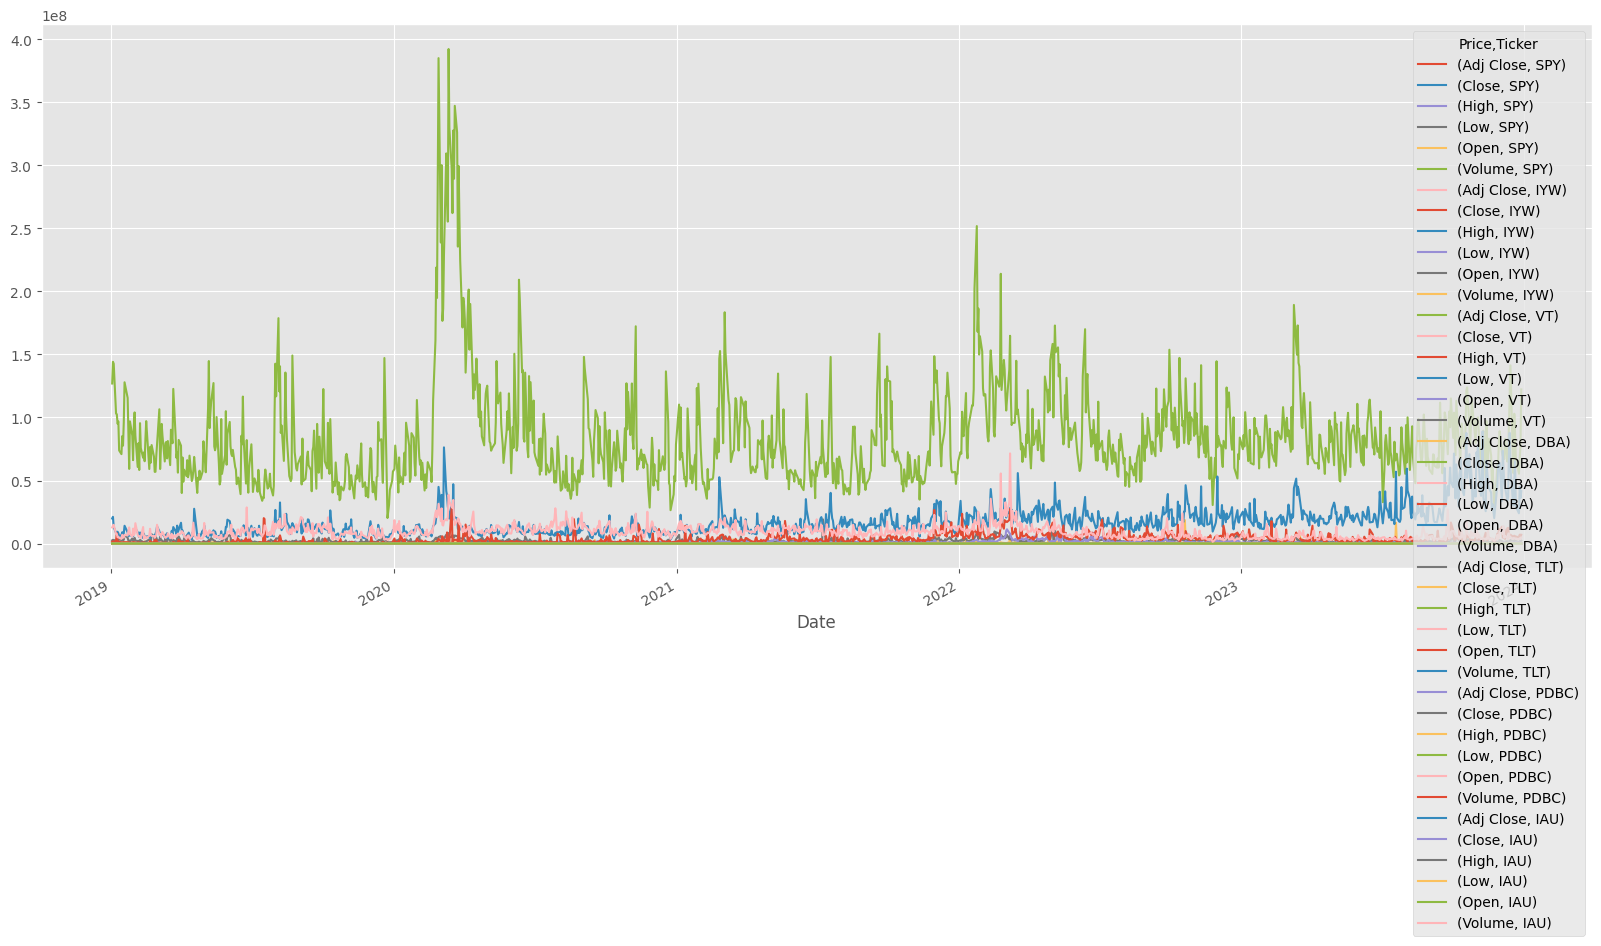

In [11]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
stock.plot(figsize=(20,8))
plt.show()
# # Import matplotlib
# import matplotlib.pyplot as plt

# # Set style and create plot
# plt.style.use('ggplot')
# stock['Close'].plot(figsize=(12,8))
# plt.title('Stock Prices Over Time')
# plt.xlabel('Date')
# plt.ylabel('Price')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()
# plt.show()



C:\Users\Admin\AppData\Local\Temp\ipykernel_4112\2766898374.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.
  covid.plot(figsize=(20,8))
C:\Users\Admin\AppData\Local\Temp\ipykernel_4112\2766898374.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.
  covid.plot(figsize=(20,8))
C:\Users\Admin\AppData\Local\Temp\ipykernel_4112\2766898374.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.
  covid.plot(figsize=(20,8))
C:\Users\Admin\AppData\Local\Temp\ipykernel_4112\2766898374.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.
  covid.plot(figsize=(20,8))
C:\Users\Admin\AppData\Local\Temp\ipykernel_4112\2766898374.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.
  covid.plot(figsize=(20,8))
C:\Users\Admin\AppData\Local\Temp\ipykernel_4112\2766898374.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.
  covid.plot(figsize=(20,8)

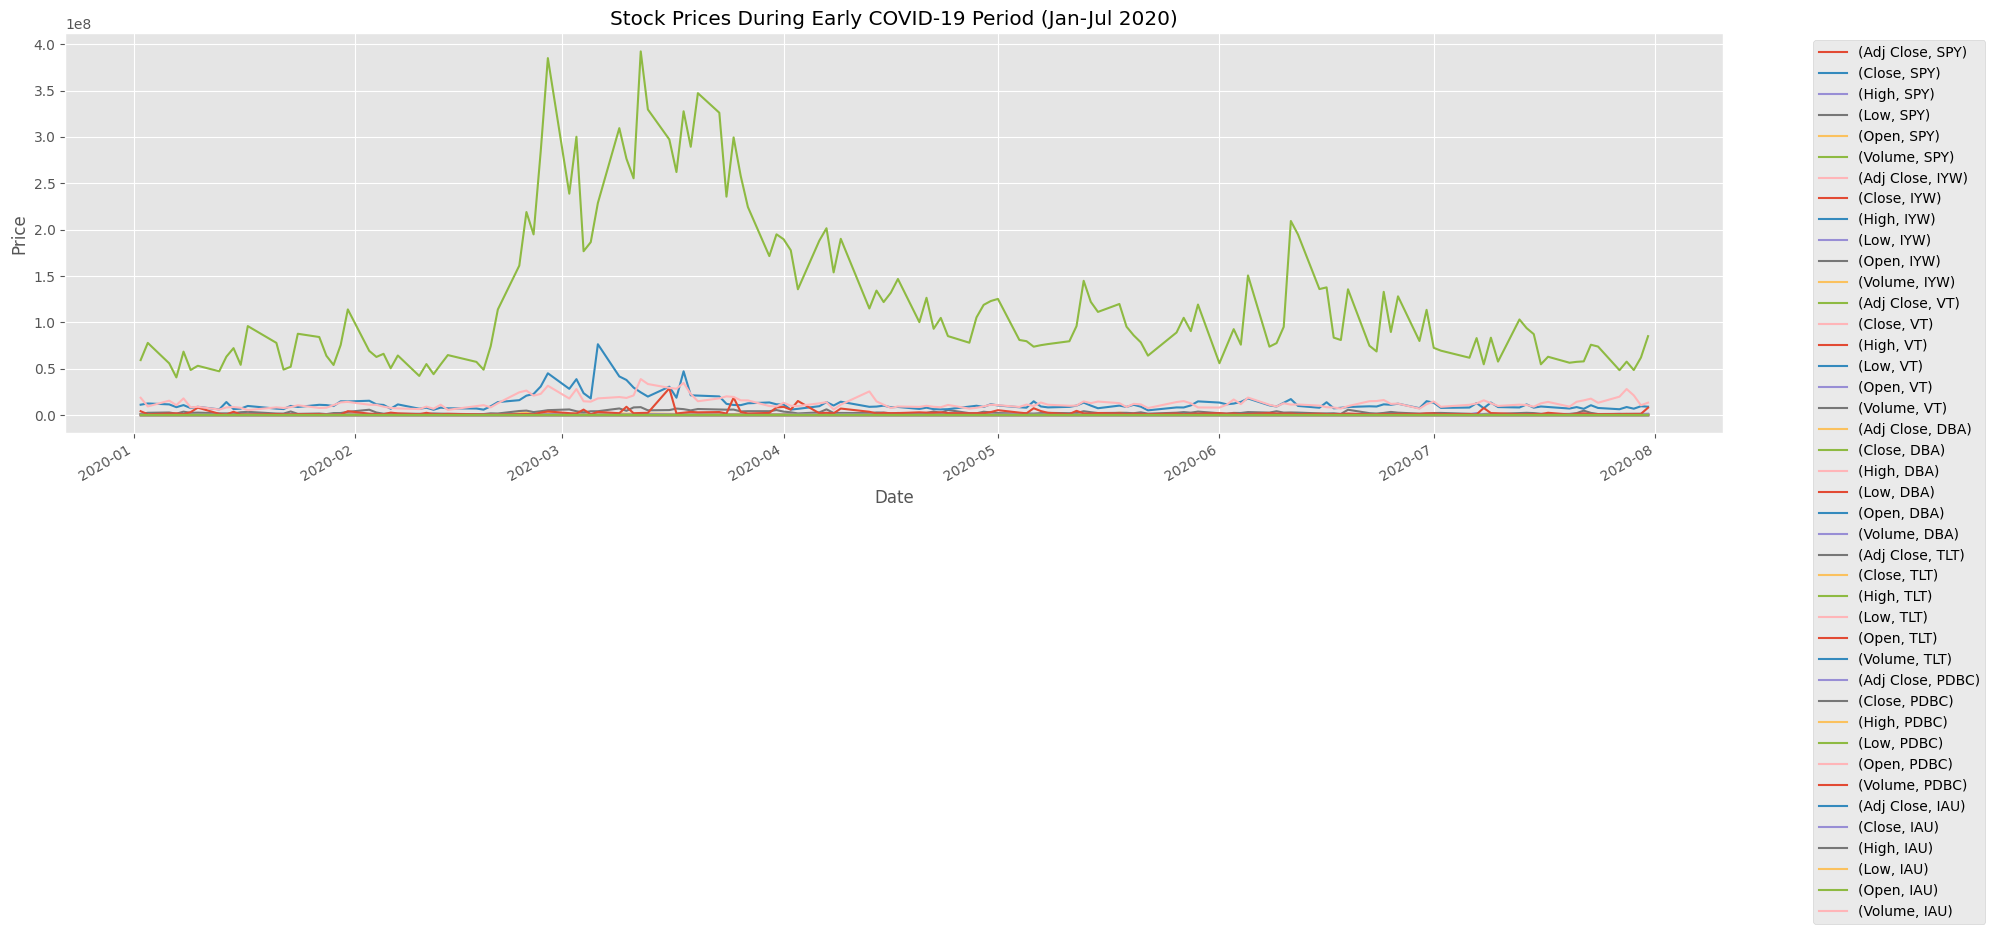

In [14]:
# covid=stock['2020-01-01':'2020-07-31']
import matplotlib.pyplot as plt
plt.style.use('ggplot')
covid.plot(figsize=(20,8))
plt.title('Stock Prices During Early COVID-19 Period (Jan-Jul 2020)')
plt.xlabel('Date') 
plt.ylabel('Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



	

C:\Users\Admin\AppData\Local\Temp\ipykernel_4112\986746081.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  covid.plot(figsize=(20,8))
C:\Users\Admin\AppData\Local\Temp\ipykernel_4112\986746081.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  covid.plot(figsize=(20,8))
C:\Users\Admin\AppData\Local\Temp\ipykernel_4112\986746081.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  covid.plot(figsize=(20,8))
C:\Users\Admin\AppData\Local\Temp\ipykernel_4112\986746081.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  covid.plot(figsize=(20,8))
C:\Users\Admin\AppData\Local\Temp\ipykernel_4112\986746081.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  covid.plot(figsize=(20,8))
C:\Users\Admin\AppData\Local\Temp\ipykernel_4112\986746081.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  covid.plot(figsize=(20,8))
C:\U

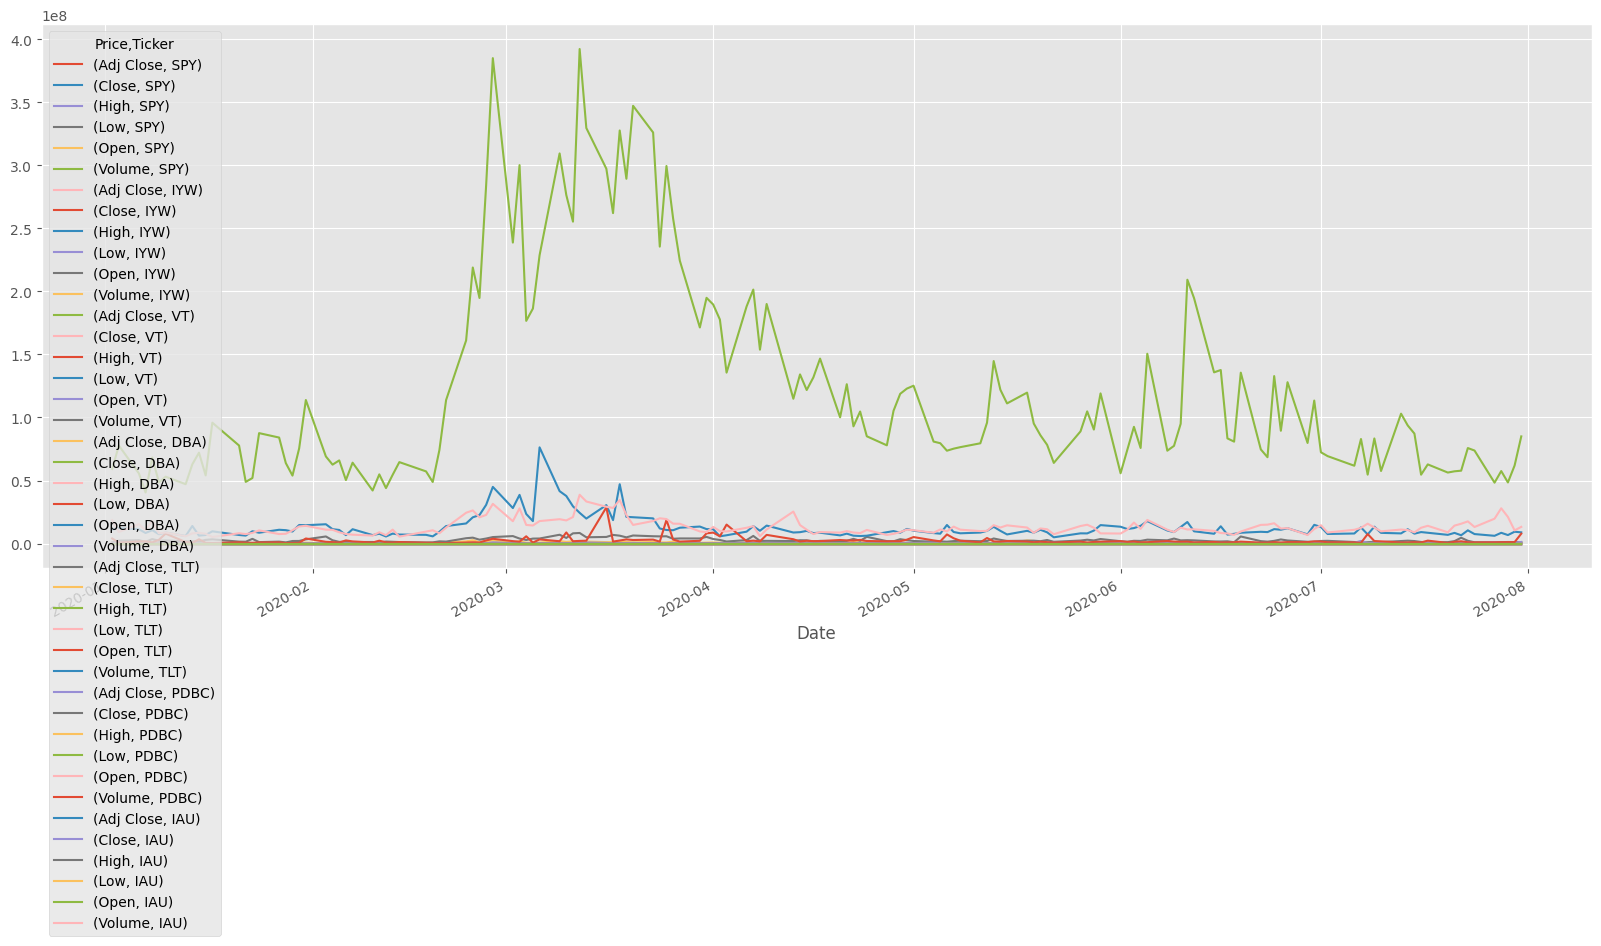

In [15]:
plt.style.use('ggplot')
covid.plot(figsize=(20,8))
plt.show()


In [18]:
# Get the data for each ETF
x = covid.index
try:
    S_Y = covid.loc[:, ('Close', 'SPY')]
    I_Y = covid.loc[:, ('Close', 'IYW')] 
    V_T = covid.loc[:, ('Close', 'VT')]
    D_B_A = covid.loc[:, ('Close', 'DBA')]
    T_L_T = covid.loc[:, ('Close', 'TLT')]
except KeyError as e:
    print(f"Error accessing data: {e}")
    print("Please verify the column names and ETF tickers exist in the dataframe")




C:\Users\Admin\AppData\Local\Temp\ipykernel_4112\685552914.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.
  S_Y = covid.loc[:, ('Close', 'SPY')]
C:\Users\Admin\AppData\Local\Temp\ipykernel_4112\685552914.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  I_Y = covid.loc[:, ('Close', 'IYW')]
C:\Users\Admin\AppData\Local\Temp\ipykernel_4112\685552914.py:6: PerformanceWarning: indexing past lexsort depth may impact performance.
  V_T = covid.loc[:, ('Close', 'VT')]
C:\Users\Admin\AppData\Local\Temp\ipykernel_4112\685552914.py:7: PerformanceWarning: indexing past lexsort depth may impact performance.
  D_B_A = covid.loc[:, ('Close', 'DBA')]
C:\Users\Admin\AppData\Local\Temp\ipykernel_4112\685552914.py:8: PerformanceWarning: indexing past lexsort depth may impact performance.
  T_L_T = covid.loc[:, ('Close', 'TLT')]


Text(0.5, 0.98, 'ETF Prices During COVID-19')

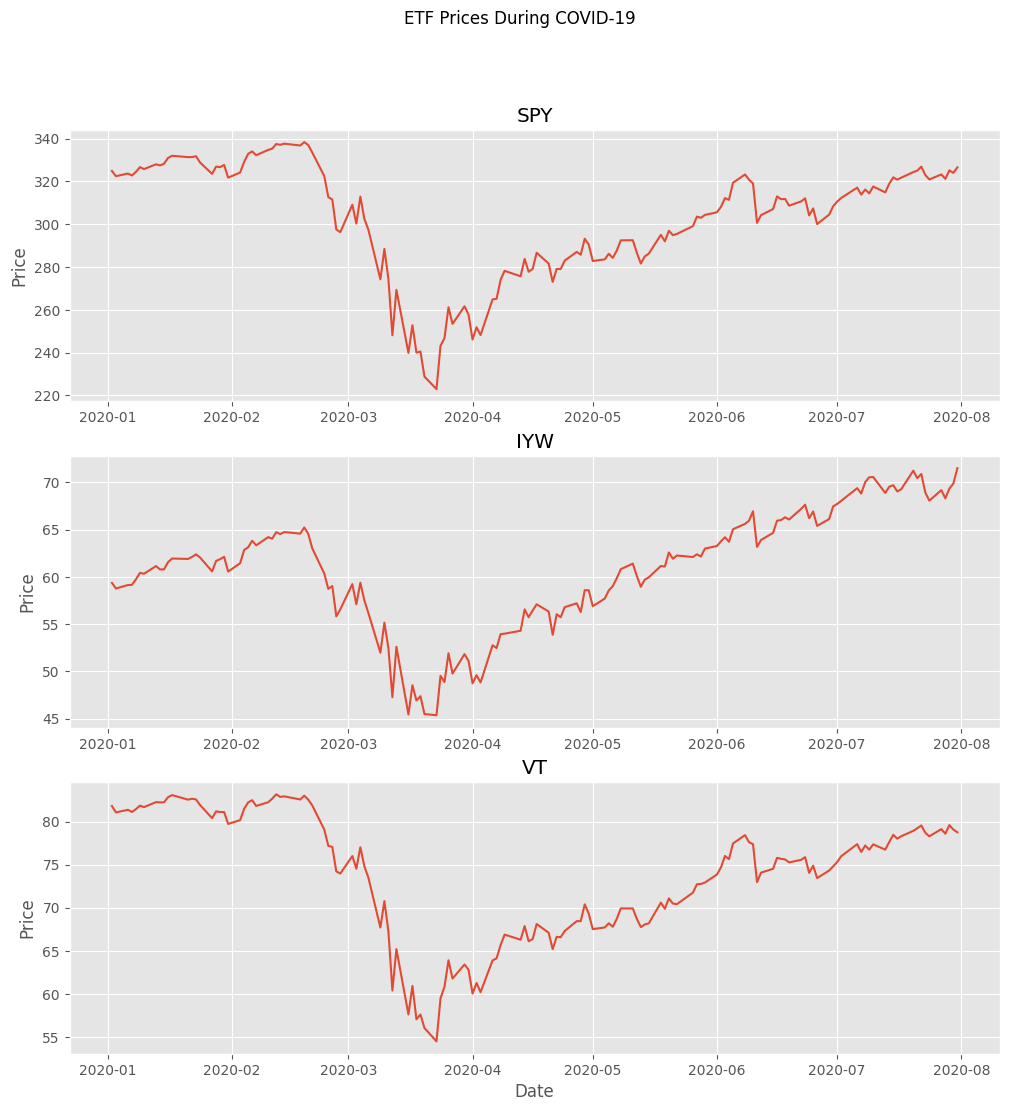

In [22]:

# Create figure with subplots
fig, axs = plt.subplots(3, 1, figsize=(12, 12))

# Plot each ETF on separate subplot
axs[0].plot(x, S_Y)
axs[0].set_title('SPY')
axs[0].set_ylabel('Price')

axs[1].plot(x, I_Y) 
axs[1].set_title('IYW')
axs[1].set_ylabel('Price')

axs[2].plot(x, V_T)
axs[2].set_title('VT') 
axs[2].set_ylabel('Price')
axs[2].set_xlabel('Date')

# Add overall title
fig.suptitle('ETF Prices During COVID-19')





In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader as pdr
from datetime import datetime, date, time, timezone
def get_stock_data(ticker, start, end):
    data = web.DataReader(ticker, 'yahoo', start, end)
    data.insert(0, "Ticker", ticker)
    return data


In [28]:

# Import yfinance since yahoo finance API is deprecated
import yfinance as yf

def get_stock_data(ticker, start, end):
    # Use yfinance to download data
    data = yf.download(ticker, start=start, end=end)
    data.insert(0, "Ticker", ticker)
    return data

df = get_stock_data("PDBC", start, end)
df.head()


[*********************100%***********************]  1 of 1 completed


Price,Ticker,Adj Close,Close,High,Low,Open,Volume
Ticker,,PDBC,PDBC,PDBC,PDBC,PDBC,PDBC
Date,,,,,,,
2020-01-02,PDBC,9.154050,16.639999,16.670000,16.520000,16.570000,4004600
2020-01-03,PDBC,9.231068,16.780001,16.840000,16.709999,16.809999,760200
2020-01-06,PDBC,9.242070,16.799999,16.910000,16.770000,16.900000,1608700
2020-01-07,PDBC,9.225567,16.770000,16.799999,16.716999,16.750000,1723200
2020-01-08,PDBC,9.099040,16.540001,16.770000,16.363001,16.770000,923300


In [29]:
df.drop(['Ticker','High','Low','Adj Close','Volume'],axis=1,inplace=True)
df.head()




C:\Users\Admin\AppData\Local\Temp\ipykernel_4112\4072934850.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df.drop(['Ticker','High','Low','Adj Close','Volume'],axis=1,inplace=True)


Price,Close,Open
Ticker,PDBC,PDBC
Date,,
2020-01-02,16.639999,16.570000
2020-01-03,16.780001,16.809999
2020-01-06,16.799999,16.900000
2020-01-07,16.770000,16.750000
2020-01-08,16.540001,16.770000


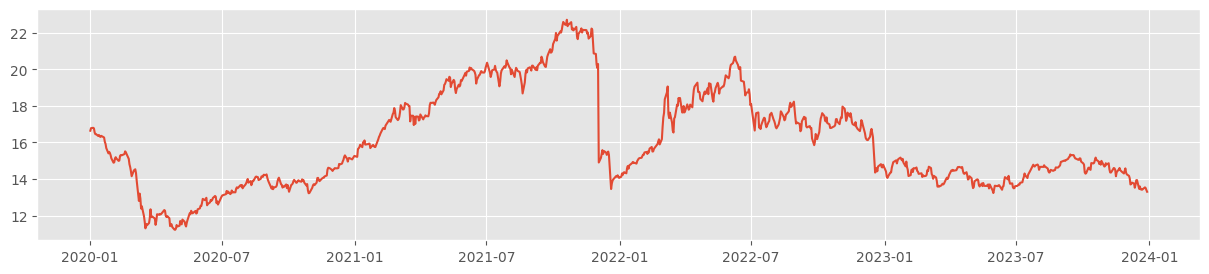

In [35]:

x = df.index
y = df['Close'].values  # Convert to numpy array
plt.figure(figsize=(15,3))
plt.plot(x, y)  # Use plot instead of bar for time series data
# plt.title('PDBC Close Price Over Time')
# plt.xlabel('Date') 
# plt.ylabel('Price')
plt.grid(True)
plt.show()






In [36]:
ticker="PDBC"
start=datetime(2020,1,1)
end=datetime(2024,1,1)

data=get_stock_data(ticker,start,end)
data.head()


[*********************100%***********************]  1 of 1 completed


Price,Ticker,Adj Close,Close,High,Low,Open,Volume
Ticker,,PDBC,PDBC,PDBC,PDBC,PDBC,PDBC
Date,,,,,,,
2020-01-02,PDBC,9.154050,16.639999,16.670000,16.520000,16.570000,4004600
2020-01-03,PDBC,9.231068,16.780001,16.840000,16.709999,16.809999,760200
2020-01-06,PDBC,9.242070,16.799999,16.910000,16.770000,16.900000,1608700
2020-01-07,PDBC,9.225567,16.770000,16.799999,16.716999,16.750000,1723200
2020-01-08,PDBC,9.099040,16.540001,16.770000,16.363001,16.770000,923300


In [37]:
df=get_stock_data(ticker,start,end)
df.head()

df.drop(['Ticker','High','Low','Adj Close','Volume'],axis=1,inplace=True)
df.head()




[*********************100%***********************]  1 of 1 completed
C:\Users\Admin\AppData\Local\Temp\ipykernel_4112\2824018466.py:4: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df.drop(['Ticker','High','Low','Adj Close','Volume'],axis=1,inplace=True)


Price,Close,Open
Ticker,PDBC,PDBC
Date,,
2020-01-02,16.639999,16.570000
2020-01-03,16.780001,16.809999
2020-01-06,16.799999,16.900000
2020-01-07,16.770000,16.750000
2020-01-08,16.540001,16.770000


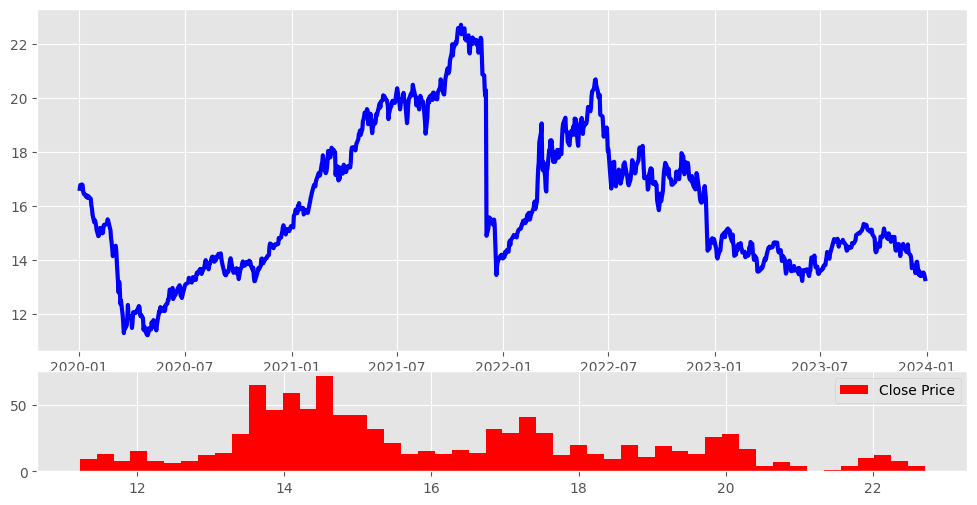

In [38]:
fig=plt.figure(figsize=(12,6))
top_grid=plt.subplot2grid((4,4),(0,0),rowspan=3,colspan=4)
bottom_grid=plt.subplot2grid((4,4),(3,0),rowspan=1,colspan=4)

top_grid.plot(df.index,df['Close'],lw=3,color='blue')
bottom_grid.hist(df['Close'],bins=50,color='red')
plt.legend(['Close Price'],loc='best')
plt.show()


In [46]:
import pandas as pd

# Example data
data = {'value': [10, 20, 30, 40, 50]}
df = pd.DataFrame(data)

# Shift the 'value' column
df['shifted'] = df['value'].shift(1)

print(df)


   value  shifted
0     10      NaN
1     20     10.0
2     30     20.0
3     40     30.0
4     50     40.0


In [47]:
stock.head()

Price,Ticker,Adj Close,Close,High,Low,Open,Volume,Ticker,Adj Close,Close,...,Low,Open,Volume,Ticker,Adj Close,Close,High,Low,Open,Volume
Ticker,,SPY,SPY,SPY,SPY,SPY,SPY,,IYW,IYW,...,PDBC,PDBC,PDBC,,IAU,IAU,IAU,IAU,IAU,IAU
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,SPY,228.403625,250.179993,251.210007,245.949997,245.979996,126925200,IYW,38.811607,40.070000,...,14.89,14.92,1382500,IAU,24.600000,24.600000,24.680000,24.500000,24.600000,12776450
2019-01-03,SPY,222.953262,244.210007,248.570007,243.669998,248.229996,144140700,IYW,37.014858,38.215000,...,15.04,15.22,1884900,IAU,24.820000,24.820000,24.820000,24.680000,24.700001,14455750
2019-01-04,SPY,230.421280,252.389999,253.110001,247.169998,247.589996,142628800,IYW,38.697803,39.952499,...,15.37,15.39,996200,IAU,24.639999,24.639999,24.660000,24.459999,24.600000,14844250
2019-01-07,SPY,232.238052,254.380005,255.949997,251.690002,252.690002,103139100,IYW,39.024700,40.290001,...,15.54,15.58,2453800,IAU,24.700001,24.700001,24.780001,24.639999,24.780001,7559100
2019-01-08,SPY,234.420029,256.769989,257.309998,254.000000,256.820007,102512600,IYW,39.458145,40.737499,...,15.62,15.65,8182200,IAU,24.639999,24.639999,24.660000,24.540001,24.559999,7574400


In [50]:

stock.loc[:, ('Close', 'SPY')]


C:\Users\Admin\AppData\Local\Temp\ipykernel_4112\2724084135.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  stock.loc[:, ('Close', 'SPY')]


Price,Close
Ticker,SPY
Date,
2019-01-02,250.179993
2019-01-03,244.210007
2019-01-04,252.389999
2019-01-07,254.380005
2019-01-08,256.769989
...,...
2023-12-22,473.649994
2023-12-26,475.649994


In [53]:

stock.loc[:, ('Close', 'SPY')].shift(1)


C:\Users\Admin\AppData\Local\Temp\ipykernel_4112\3233079961.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  stock.loc[:, ('Close', 'SPY')].shift(1)


Price,Close
Ticker,SPY
Date,
2019-01-02,NaN
2019-01-03,250.179993
2019-01-04,244.210007
2019-01-07,252.389999
2019-01-08,254.380005
...,...
2023-12-22,472.700012
2023-12-26,473.649994


pandas_Series_shift()

In [22]:
pip install pandas 

Note: you may need to restart the kernel to use updated packages.


In [23]:
pip show pandas

Name: pandas
Version: 2.2.3
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: 
Author-email: The Pandas Development Team <pandas-dev@python.org>
License: BSD 3-Clause License
        
        Copyright (c) 2008-2011, AQR Capital Management, LLC, Lambda Foundry, Inc. and PyData Development Team
        All rights reserved.
        
        Copyright (c) 2011-2023, Open source contributors.
        
        Redistribution and use in source and binary forms, with or without
        modification, are permitted provided that the following conditions are met:
        
        * Redistributions of source code must retain the above copyright notice, this
          list of conditions and the following disclaimer.
        
        * Redistributions in binary form must reproduce the above copyright notice,
          this list of conditions and the following disclaimer in the documentation
          and/or other materials 